<a href="https://colab.research.google.com/github/jamg-upv/LLMforSLRscreening/blob/main/UBdocSchoolMAy25/chatgptAPI_CasoUso1clasificacionPROMPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción del caso de uso GPTUS01-entity_extraction
basado en Reto21-chatgptAPI-CasoUso1HIWPclasificacion.ipynb

Clonar el bot que tengo en poe.com sobre entity extraction y clasificación de resumenes de artículos.

LA entrada es una tabla con dos columnas
ID|abstract
El resultado quiero que me genere una tabla con
Id|Entity extraction separada por ";"|clasificacion|rationale para la clasificación

Manualmente copiando y pegando el input y los resultados (de 20 en 20) me funciona dentro de la ventana de contexto. Pero quiero evitar tener que hacerlo a mano.

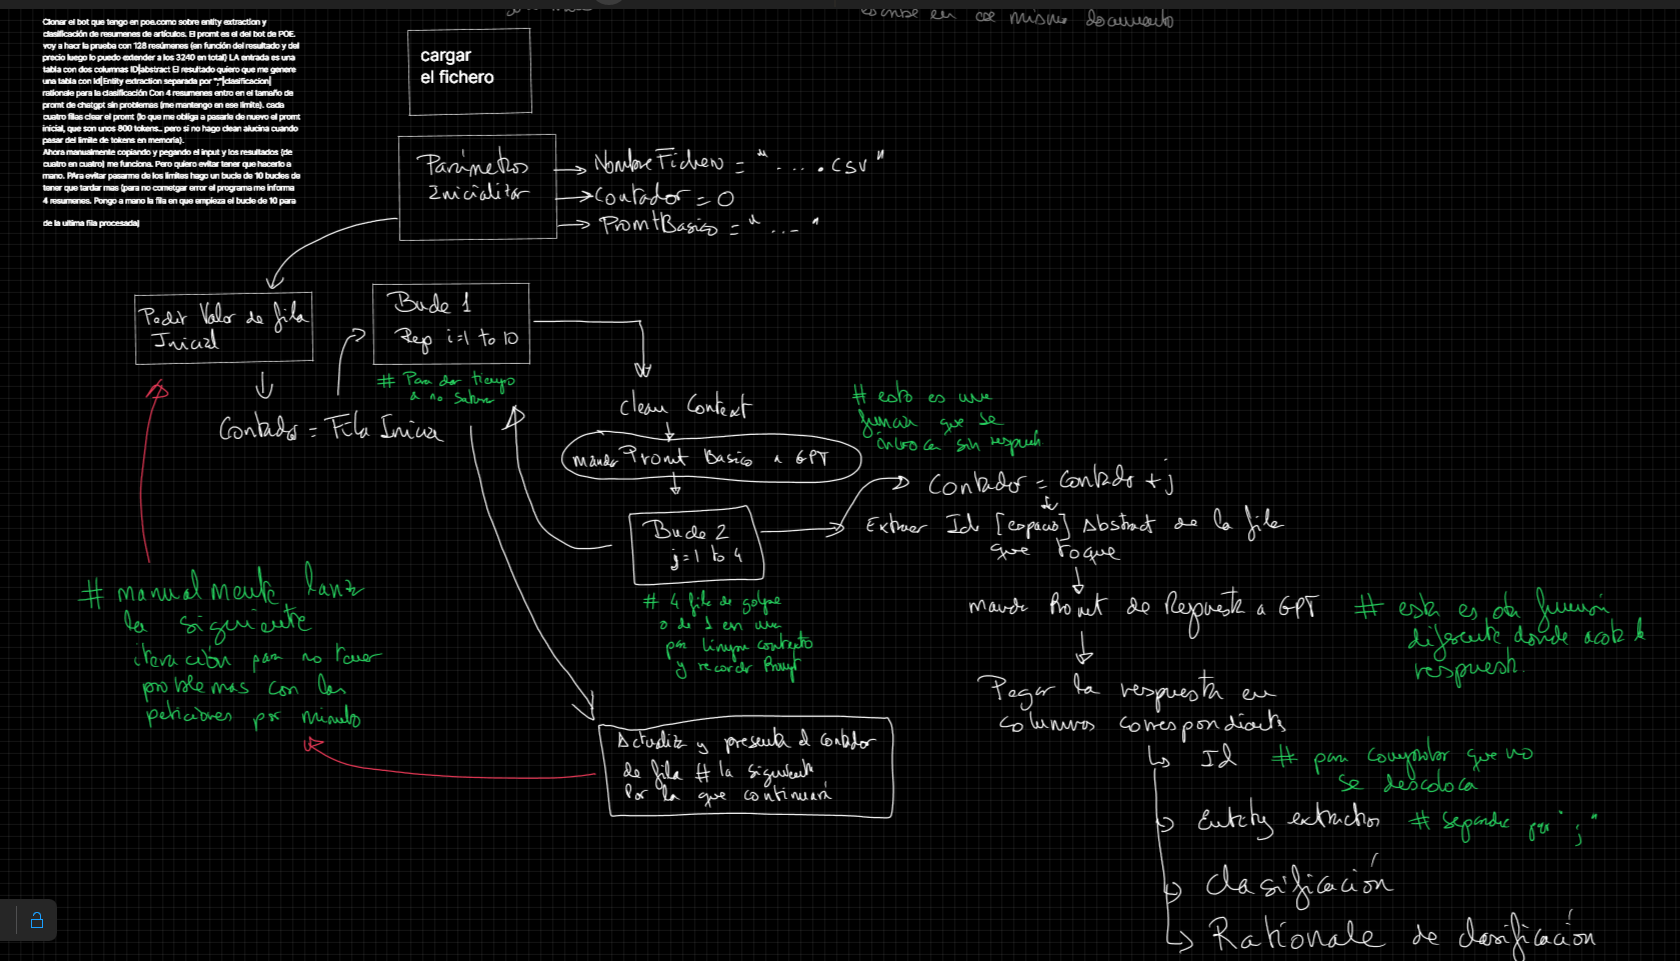

# Archivo de trabajo

In [ ]:
# En Python, puedes usar comillas simples o dobles para definir una cadena de texto (string). Ambas son válidas y no hay diferencia funcional entre ellas.
#  si tu cadena de texto contiene una comilla simple (como en "I'm"), puedes usar comillas dobles para evitar tener que escapar la comilla simple. De manera similar, si tu cadena de texto contiene una comilla doble, puedes usar comillas

# RutaData = input("Ruta completa al archivo (ejemplo: https://gdocu.upv.es/share/proxy/alfresco.xls ): ")

# RutaData="https://gdocu.upv.es/share/proxy/alfresco-noauth/api/internal/shared/node/content/OTK2Nh_hTECdtOHp0DRxYg"

RutaData="WOS-SCOLista global sin duplicadosV2-CodHumano.xlsx"

# Este código lee el archivo XLS ubicado en la URL especificada y lo carga en un DataFrame de pandas llamado DataPapers.
# Debes tener en cuenta que read_excel() necesita la biblioteca openpyxl o xlrd para leer archivos de Excel,
# si no la tienes instalada, puedes hacerlo con pip install openpyxl o pip install xlrd.
# Además, también necesitas tener la biblioteca requests para leer archivos desde una URL. Si no la tienes instalada, puedes hacerlo con pip install requests.

import pandas as pd

# Leemos el archivo en un DataFrame
DataPapers = pd.read_excel(RutaData)

DataPapers['Prompt'] = DataPapers['Id'].astype(str) + "# "  + DataPapers['Title'] + ". "+ DataPapers['Abstract']
DataPapers

# Definimos las columnas que queremos mantener
columnas = ["Id", "Title","Abstract", "Prompt"]

# Seleccionamos las columnas y las primeras 128 filas
# DataPapers = DataPapers[columnas].iloc[:10]

# Seleccionamos las columnas y TODAS las filas (no solo las primeras 10)
DataPapers = DataPapers[columnas]  # Eliminamos el .iloc[:10]


DataPapers



,Id,Title,Abstract,Prompt
0,23JSJZRE--10.17270/J.LOG.2022.735,ANALYZING NEW WAYS TO ADAPT THE TRIPLE-A SUPPL...,Background: With the emergence of supply chain...,23JSJZRE--10.17270/J.LOG.2022.735# ANALYZING N...
1,24US6F9Q--10.31838/srp.2020.2.107,Influence of supply chain uncertainty on the a...,Purpose: The purpose of the research was to ev...,24US6F9Q--10.31838/srp.2020.2.107# Influence o...
2,26NMHAUV--10.1002/kpm.327,A model for continuous improvement in supplier...,This paper presents and tests a model designed...,26NMHAUV--10.1002/kpm.327# A model for continu...
3,27BYB3DS--10.1108/IMDS-03-2022-0167,Data analytics dynamic capabilities for Triple...,Purpose This study aims to analyze the mediati...,27BYB3DS--10.1108/IMDS-03-2022-0167# Data anal...
4,299JRX43--10.1002/jtr.2381,Role of tourism IT adoption and risk managemen...,The study explored the influence of tourism IT...,299JRX43--10.1002/jtr.2381# Role of tourism IT...
...,...,...,...,...
588,ZVR7LW5P--0,Exploring the mediating role of supply chain f...,The key challenge of today's global marketplac...,ZVR7LW5P--0# Exploring the mediating role of s...
589,ZYBIDQHS--0,The relationship between knowledge management ...,"In recent years, different concepts have been ...",ZYBIDQHS--0# The relationship between knowledg...
590,ZYTAGYGD--10.3390/su14148928,Environmental Uncertainties and Competitive Ad...,"In this study, the direct effect of environmen...",ZYTAGYGD--10.3390/su14148928# Environmental Un...
591,ZZHSND3P--10.1108/JBIM-05-2021-0262,Antecedents and consequences of supply chain a...,Purpose An agile supply chain (SC) is critical...,ZZHSND3P--10.1108/JBIM-05-2021-0262# Anteceden...


#introducir api key OpenAI (jecutar una vez cada sesión)

In [ ]:
#manual
import getpass

# Solicitar la entrada al usuario
keyOpenAi= getpass.getpass("Introduce API KEY sin comillas: ")

Introduce API KEY sin comilles: ··········


In [ ]:
#automatico

from google.colab import userdata
keyOpenAi = userdata.get('KeyOpenAi')

In [ ]:
!pip install openai

import os
from openai import OpenAI

# Inicialización del cliente con la API moderna
client = OpenAI(api_key=keyOpenAi)

# Selección del modelo precio  Input	Cached input	Output  https://platform.openai.com/docs/pricing
# ModelUsed="gpt-4.1-2025-04-14"        #$2.00 $0.50  S8.00
ModelUsed="gpt-4o-mini-2024-07-18"  #$0.15 $0.075 $0.60
# ModelUsed="o4-mini-2025-04-16"      #$1.10 $0.275 $4.40



# Convertir en un bucle y usar funcion para tener un codigo más limpio

In [ ]:
PromtSystemB = '''
# Role and Context
You are an operations management scientist specializing in screening scientific articles related to supply chain agility and performance. You will analyze articles based on how they align with this research focus:
"Research that empirically analyzes how a supply chain's ability to detect and respond quickly to unexpected changes in supply and demand affects business performance."

# Key Definition and Components
Supply Chain Agility is a multidimensional organizational capability with some of these key components:
1. Accessibility and agile acquisition of relevant data
2. Early alertness to threats and opportunities
3. Effective decision-making based on available information
4. Flexibility to adapt operations and tactics
5. Joint planning among supply chain actors
6. Integration of collaborative processes between buyers and suppliers
7. Ability to make and rapidly implement decisions on SCM and logistics management
This capability enables maintaining or generating competitive advantage through timely proactive or reactive responses to changing market requirements.

# Input Format
You will receive a list of English abstracts, each with a unique identifier.

# Processing Instructions
For each abstract, follow these four steps:

1. Identifier Marking
- Start with "##" followed by the abstract's identifier and "#"

2. Entity Extraction
- Extract relevant entities from the abstract
- Separate entities with semicolons (;)
- End with "#"
- Focus on extracting:
  * Research methods used
  * Supply chain aspects studied
  * Performance measures
  * Analysis techniques
  * Industry context
  * Key variables

3. Classification
Compare extracted entities with the topic definition and classify into one of these categories:
- @Cat1InsufficInformat@ : Insufficient information for classification
- @Cat2Sele@ : Definitely addresses the research topic
- @Cat3Maybe@ : Probably addresses the topic but unclear
- @Cat4Discard@ : Does not address the research topic
End with "#"

 4. Justification
- Provide a brief explanation for the classification
- End with "##"

# Output Format
Present results in a three-column table using:
- Tab-separated columns (\t)
- New lines between rows (\n)
- Columns:
  1. Abstract identifier
  2. Extracted entities (semicolon-separated)
  3. Classification category

# Classification Criteria

To be classified as @Cat2Sele@, abstract must show:
1. Empirical research approach
2. Clear focus on supply chain agility (per definition)
3. Analysis of business performance impact
4. Evidence-based methodology

# Sample Analysis
Input:
ID: [ABC123]   Abstract: [Abstract text]


Output:
##ABC123#Supply chain flexibility; manufacturing performance; empirical survey; structural equation modeling; automotive industry#@Cat2Sele@#The study employs empirical methods to directly examine supply chain agility's impact on performance, using validated measures and appropriate analytical techniques##

'''

# #  la "temperatura" es un hiperparámetro que controla la aleatoriedad de las predicciones del modelo.
#  Un valor de temperatura más alto (como 0.8 o 1.0) hará que el modelo haga predicciones más diversas y creativas,
#  mientras que un valor más bajo (como 0.2 o 0.3) hará que las predicciones sean más concentradas y deterministas.
# # Dado que tu tarea implica la extracción de entidades, la clasificación y la explicación,
# querrías que las respuestas del modelo sean coherentes y directas en lugar de ser demasiado creativas.
# Por lo tanto, te recomendaría una temperatura más baja, posiblemente alrededor de 0.3.

Temperatura=1 #por debajo de 0.5 pocas veces sigue las instrucciones (no llega al cuarto paso o no pone los # donde toca)



In [ ]:
# Crear un DataFrame vacío
df3 = pd.DataFrame(columns=['GPTId', 'GPTContent','GPTResponse','GPTUsage','PromtAgregado'])

In [ ]:
# código refacturizado: para hacer esto
#  extrayendo el texto de una fila de un dataframe,
#   usándolo como entrada para la API de ChatCompletion de OpenAI,
#   e insertando la respuesta en otro dataframe.
# Este código asume que tienes una cierta flexibilidad en la elección de tus filas de inicio y fin.
#  Si siempre estás procesando la siguiente fila y no tienes un rango fijo,
#   podrías considerar almacenar la "fila actual" en una variable persistente o en un archivo, y actualizarla cada vez que ejecutes la función.

# La función generate_response_and_update_df toma el DataFrame donde quieres guardar la respuesta,
#  el índice de la fila a actualizar, el modelo de OpenAI a utilizar, los mensajes del sistema y del usuario, y la temperatura para la generación de texto.
#  Luego realiza la llamada a la API de OpenAI, imprime la información de uso y el contenido de la respuesta, actualiza el DataFrame con la información de la respuesta y finalmente devuelve el DataFrame actualizado.
import time

def generate_response_and_update_df(df, row, model, system_prompt, user_prompt, temperature):
    # Llamada a la API de OpenAI con la sintaxis actualizada
    response = client.chat.completions.create(
      model=model,
      messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
      temperature=temperature
    )

    # Imprimir la información de los tokens y el contenido de respuesta
    print(response.usage)
    print(response.choices[0].message.content)

    # Añadir la respuesta GPT al DataFrame
    df.loc[row, 'GPTId'] = row
    df.loc[row, 'GPTContent'] = response.choices[0].message.content
    df.loc[row, 'GPTResponse'] = str(response)
    df.loc[row, 'GPTUsage'] = str(response.usage)
    df.loc[row, 'PromtAgregado'] = user_prompt

    return df

# Llamada a la función en un bucle
start_row = 299
end_row = 593
fixed_delay = 0.05  # la idea es no pasarse de 200 peticiones por minuto, incluso sin delay va a unas 30 peticiones por minuto

for row in range(start_row, end_row):
    PromtUser1 = DataPapers['Prompt'].iloc[row]
    df3 = generate_response_and_update_df(df3, row, ModelUsed, PromtSystemB, PromtUser1, Temperatura)
    print(f"Procesada fila {row + 1} de {end_row}")

    # Guardar periódicamente para no perder progreso
    if row % 50 == 0 and row > 0:  # Cada 50 filas
        df3.to_csv(f"resultados_parciales_hasta_fila_{row}.csv", index=False)
        print(f"Progreso guardado hasta la fila {row}")

    # Pausa fija entre peticiones
    if row < end_row - 1:  # No esperar después de la última fila
        time.sleep(fixed_delay)

# Guardar resultado final
df3.to_csv("resultados_finales.csv", index=False)
print("Proceso completado!")

df3





CompletionUsage(completion_tokens=1318, prompt_tokens=803, total_tokens=2121, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=1216, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))
##I3T2FIDQ--0#quantitative research; convenience sampling; multiple linear regression; SPSS; agility; adaptability; alignment; supply chain performance; food and beverage SMEs; Semarang City, Indonesia#@Cat2Sele@#The study employs an empirical quantitative approach to assess supply chain agility components (agility, adaptability, alignment) and their impact on supply chain performance using regression analysis##
Procesada fila 300 de 593
CompletionUsage(completion_tokens=1532, prompt_tokens=866, total_tokens=2398, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=1408, rejected_prediction_tokens=0), prompt_tokens_details=Prom

,GPTId,GPTContent,GPTResponse,GPTUsage,PromtAgregado
299,299,##I3T2FIDQ--0#quantitative research; convenien...,ChatCompletion(id='chatcmpl-BS81Js2zfMOC0q7Fpd...,"CompletionUsage(completion_tokens=1318, prompt...",I3T2FIDQ--0# Triple a strategy to improve supp...
300,300,##I564PH97--10.1108/13598540910927296#survey r...,ChatCompletion(id='chatcmpl-BS81d4u4J0bjoVstsp...,"CompletionUsage(completion_tokens=1532, prompt...",I564PH97--10.1108/13598540910927296# Impact of...
301,301,##I5EX9YQ7--0#interpretive structural modeling...,ChatCompletion(id='chatcmpl-BS81otZo87duTERHkq...,"CompletionUsage(completion_tokens=350, prompt_...",I5EX9YQ7--0# A green supply chain agility inde...
302,302,##IBCEN9KD--10.1504/IJASM.2007.015682#Interpre...,ChatCompletion(id='chatcmpl-BS81rsux1bVPqUUcC6...,"CompletionUsage(completion_tokens=743, prompt_...",IBCEN9KD--10.1504/IJASM.2007.015682# Supply ch...
303,303,IC2KHM9T--0\tSEM-PLS; response rate 75.1%; dat...,ChatCompletion(id='chatcmpl-BS8200LRnw8fpSinwB...,"CompletionUsage(completion_tokens=1231, prompt...",IC2KHM9T--0# The impact of the social capital ...
...,...,...,...,...,...
588,588,Abstract ID\tExtracted Entities\tClassificatio...,ChatCompletion(id='chatcmpl-BS8w64d8x47EC2Lvjo...,"CompletionUsage(completion_tokens=1217, prompt...",ZVR7LW5P--0# Exploring the mediating role of s...
589,589,##ZYBIDQHS--0#Empirical case study; sample siz...,ChatCompletion(id='chatcmpl-BS8wIzjOOKbQkeKVo8...,"CompletionUsage(completion_tokens=1261, prompt...",ZYBIDQHS--0# The relationship between knowledg...
590,590,AbstractID\tExtractedEntities\tClassification\...,ChatCompletion(id='chatcmpl-BS8wS3a7yeITq86S4T...,"CompletionUsage(completion_tokens=1711, prompt...",ZYTAGYGD--10.3390/su14148928# Environmental Un...
591,591,ZZHSND3P--10.1108/JBIM-05-2021-0262\tsurvey; s...,ChatCompletion(id='chatcmpl-BS8wmYeuBV3l4LvcOb...,"CompletionUsage(completion_tokens=1273, prompt...",ZZHSND3P--10.1108/JBIM-05-2021-0262# Anteceden...


In [ ]:
# Guardamos el DataFrame en un archivo Excel

# Definimos la ruta y el nombre del archivo incluyendo la fecha actual
from datetime import datetime
fecha_actual = datetime.now().strftime("%Y-%m-%d %H:%M")
nombre_base = f"{ModelUsed} B2-{Temperatura}"
nombre_fichero = f"{nombre_base}_{fecha_actual}.xlsx"

df3.to_excel(nombre_fichero, index=False)

# mejoras

